Прочитайте csv файл (використовуйте функцію read_csv)
Виведіть перші п'ять рядків (використовується функція head)
Виведіть розміри датасету (використовуйте атрибут shape)
Відповідь: Про скільки книг зберігає дані датасет?

In [162]:
import pandas as pd
books = pd.read_csv('bestsellers with categories.csv')

print(books.head())
print(books.shape)
#Про скільки книг зберігає дані датасет? -549 книг

                                                Name                    Author  User Rating  Reviews  Price  Year        Genre
0                      10-Day Green Smoothie Cleanse                  JJ Smith          4.7    17350      8  2016  Non Fiction
1                                  11/22/63: A Novel              Stephen King          4.6     2052     22  2011      Fiction
2            12 Rules for Life: An Antidote to Chaos        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction
3                             1984 (Signet Classics)             George Orwell          4.7    21424      6  2017      Fiction
4  5,000 Awesome Facts (About Everything!) (Natio...  National Geographic Kids          4.8     7665     12  2019  Non Fiction
(550, 7)


Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
Відповідь: Які є унікальні жанри?
Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
Відповідь: Максимальна ціна?
Відповідь: Мінімальна ціна?
Відповідь: Середня ціна?
Відповідь: Медіанна ціна?


Count of missing values in each column:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
['Non Fiction' 'Fiction']


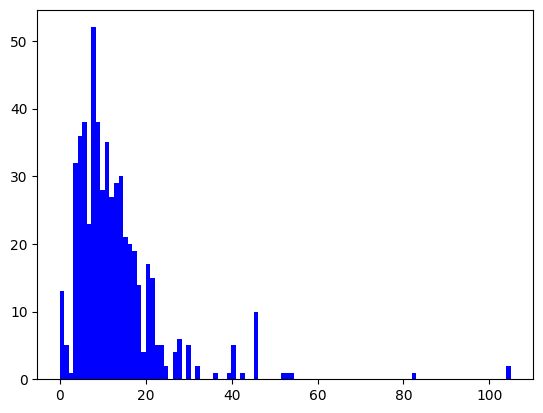

min         0.0
max       105.0
mean       13.1
median     11.0
Name: price, dtype: float64

In [163]:
import matplotlib.pyplot as plt

books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print("\nCount of missing values in each column:")
print(books.isnull().sum())
# пропусків не має

print (books['genre'].unique())
# жанри - 'Non Fiction' 'Fiction'

plt.hist(books.price, bins=100,color='blue')
plt.show()

books.price.agg(['min','max','mean','median'])
# Відповідь: Максимальна ціна? - 105
# Відповідь: Мінімальна ціна? - 0
# Відповідь: Середня ціна? - 13,1
# Відповідь: Медіанна ціна? - 11



Пошук та сортування даних
​Відповідь: Який рейтинг у датасеті найвищий? Відповідь:
Відповідь: Скільки книг мають такий рейтинг? Відповідь:
Відповідь: Яка книга має найбільше відгуків? Відповідь:
Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
Відповідь: Яка книга остання у відсортованому списку? Відповідь:

In [164]:
pd.options.display.width=200

books.user_rating.agg('max')
# Відповідь: Який рейтинг у датасеті найвищий? Відповідь: - 4.9

print(f"books Qty with 4.9 rating is: {len(books[books['user_rating']==4.9])}")
# Відповідь: Скільки книг мають такий рейтинг? Відповідь: - 52

print('\nЯка книга має найбільше відгуків?')
print(books[['reviews','name','author']].sort_values('reviews',ascending=False).head(1))
# Відповідь: Яка книга має найбільше відгуків? Відповідь: - 87841

print('\nЗ тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча')
top50 = books[['name','author','price','reviews','year','user_rating','genre']].sort_values('user_rating',ascending=False).head(50)
print(top50[top50['year']==2015][['name','author','reviews','price']].sort_values('price',ascending=False).head(1))
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: - Publication Manual of the American Psychologic...

print('\nСкільки книг жанру Fiction потрапили до Топ-50 у 2010 році')
print(f"Qty of fiction in Top 50 in 2010 is: {len(top50[(top50['genre']=='Fiction') & (top50['year']==2010)])}")
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: - 0

print('\nСкільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках')
print(f"Qty of 4.9 rank in TOP-50 in 2010 and 2011 is: {len(top50[(top50['user_rating']==4.9) & (top50['year'].isin([2010,2011]))])}")
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:

print('\nВідповідь: Яка книга остання у відсортованому списку?')
print(top50[(top50['year']==2015)&top50['price']<8].sort_values('price',ascending=True).tail(1))

books Qty with 4.9 rating is: 52

Яка книга має найбільше відгуків?
     reviews                     name       author
534    87841  Where the Crawdads Sing  Delia Owens

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча
                             name           author  reviews  price
174  Humans of New York : Stories  Brandon Stanton     2812     17

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році
Qty of fiction in Top 50 in 2010 is: 0

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках
Qty of 4.9 rank in TOP-50 in 2010 and 2011 is: 1

Відповідь: Яка книга остання у відсортованому списку?
                         name              author  price  reviews  year  user_rating        genre
151  Hamilton: The Revolution  Lin-Manuel Miranda     54     5867  2016          4.9  Non Fiction


Агрегування даних та з'єднання таблиць

​

Остання секція цього домашнього завдання включає просунутіші функції. Але не хвилюйтеся, pandas робить усі операції простими та зрозумілими.

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
Відповідь: Максимальна ціна для жанру Fiction: Відповідь
Відповідь: Мінімальна ціна для жанру Fiction: Відповідь
Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь
Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь
Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
Відповідь: Якої розмірності вийшла таблиця? Відповідь:
Відповідь: Який автор має найбільше книг? Відповідь:
Відповідь: Скільки книг цього автора? Відповідь:
Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:
Відповідь: Який у цього автора середній рейтинг? Відповідь:
З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
Відповідь: Який автор перший у списку?


In [165]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів 
# (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). 
print(books[['genre','price']].groupby('genre').agg(['min','max','mean']).reset_index())
# Відповідь: Максимальна ціна для жанру Fiction: Відповідь - 82
# Відповідь: Мінімальна ціна для жанру Fiction: Відповідь - 0
# Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь - 105
# Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь - 0

# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
# (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
print('\n')

authors_count = books[['author','name']].groupby('author').agg({'name': 'count'}).reset_index()
authors_count = authors_count.rename(columns={'name': 'book_count'})
print(f'розмірність таблиці: {authors_count.shape}')
print('\n')
print(f'автор з найбільшою кількістю книг:')
print('\n')
print(authors_count.loc[authors_count['book_count'].idxmax()])
# Відповідь: Якої розмірності вийшла таблиця? Відповідь: (248,1)
# Відповідь: Який автор має найбільше книг? Відповідь: - Jeff Kinney
# Відповідь: Скільки книг цього автора? Відповідь: - 12



         genre price                
                 min  max       mean
0      Fiction     0   82  10.850000
1  Non Fiction     0  105  14.841935


розмірність таблиці: (248, 2)


автор з найбільшою кількістю книг:


author        Jeff Kinney
book_count             12
Name: 120, dtype: object


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:
Відповідь: Який у цього автора середній рейтинг? Відповідь:

In [166]:
# books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
authors_rank = books[['author','user_rating']].groupby('author').agg({'user_rating': 'mean'}).reset_index()
authors_rank = authors_rank.rename(columns={'user_rating': 'average_rating'})

print(authors_rank.loc[authors_rank['average_rating'].idxmin()])
# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: -Donna Tartt
# Відповідь: Який у цього автора середній рейтинг? Відповідь: - 3.9


author            Donna Tartt
average_rating            3.9
Name: 71, dtype: object


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
Відповідь: Який автор перший у списку?


In [167]:
merge_authors = pd.concat([authors_count[['author','book_count']],authors_rank[['average_rating']]],axis=1,join = 'inner')
merge_authors.sort_values(by=['book_count','average_rating'],ascending=[True,True])
# Відповідь: Який автор перший у списку? - Muriel Barbery

,author,book_count,average_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727
